Import lib

In [29]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

Enter the equation:

In [30]:
equation = input("Enter the equation:")

Enter the equation:(1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2


In [31]:
f  = lambda x, y: eval(equation)

Function to visualize the equation

In [32]:
def visualize_equation(min_, max_, steps):
        x, y = np.meshgrid(np.arange(min_, max_ + steps, steps), np.arange(min_, max_ + steps, steps))
        z = f(x, y)
        
        #plot
        fig = plt.figure(figsize=(8, 5))
        ax = plt.axes(projection='3d', elev=50, azim=-50)

        ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$z$')

        ax.set_xlim((min_, max_))
        ax.set_ylim((min_, max_))

        plt.show()

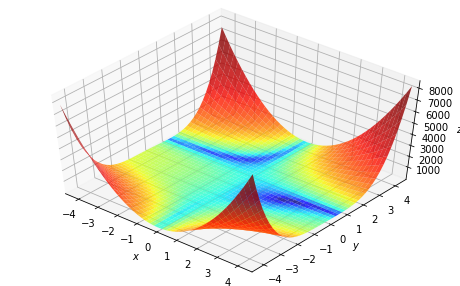

In [33]:
visualize_equation(-4.5, 4.5, 0.2)

In [34]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [35]:
def gradient_2D_Contour_plot(min_, max_, steps, init_x, init_y):
    x0 = np.array([init_x, init_y])
    func = value_and_grad(lambda args: f(*args))
    path_ = [x0]
    res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
        

    path = np.array(path_).T
    
    fig, ax = plt.subplots(figsize=(10, 6))
    x, y = np.meshgrid(np.arange(min_, max_ + steps, steps), np.arange(min_, max_ + steps, steps))
    z = f(x, y)

    minima = path_[-1]
    minima_ = minima.reshape(-1, 1)
    minima_

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    ax.plot(*minima_, 'r*', markersize=18)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((min_, max_))
    ax.set_ylim((min_, max_))
    
    
    plt.show()
    return path

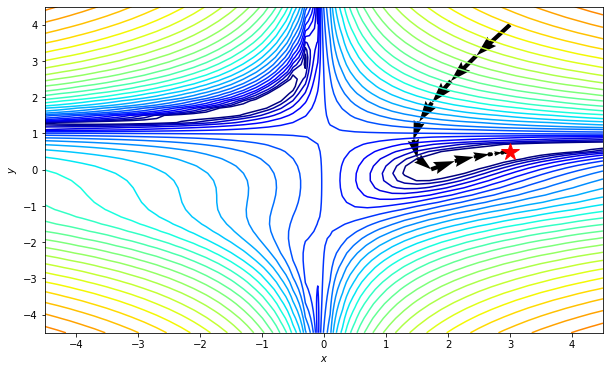

array([[3.        , 2.46035623, 2.04699913, 1.74176536, 1.53643615,
        1.4410397 , 1.50868379, 1.72870119, 2.11013701, 2.41816696,
        2.66718519, 2.6700115 , 2.69508658, 2.74913914, 2.8765339 ,
        2.87718785, 2.9289574 , 2.99175651, 2.99183659, 2.99953595,
        2.99999978, 2.99999979, 2.99999994, 2.99999994, 2.99999994],
       [4.        , 3.15034811, 2.44787096, 1.85216062, 1.3245132 ,
        0.82249607, 0.31201921, 0.0107044 , 0.23738386, 0.35251516,
        0.42576784, 0.42057928, 0.42750222, 0.44208048, 0.47459815,
        0.47300943, 0.48497072, 0.49860567, 0.49829041, 0.4999081 ,
        0.49999997, 0.49999996, 0.49999999, 0.49999999, 0.49999999]])

In [36]:
gradient_2D_Contour_plot(-4.5, 4.5, 0.2, 3, 4)

Animation

(-4.5, 4.5)

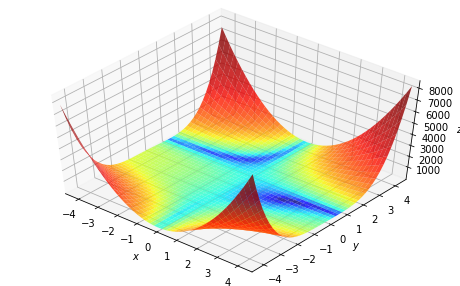

In [37]:

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
    
min_ = -4.5
max_ = 4.5
steps = 0.2    

x, y = np.meshgrid(np.arange(min_, max_ + steps, steps), np.arange(min_, max_ + steps, steps))
z = f(x, y)
    

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
#ax.plot(*minima_, f(*minima_), 'r*', markersize=10)
    

    
    
line, = ax.plot([], [], [], 'b', label='Newton-CG', linewidth=5)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim((min_, max_))
ax.set_ylim((min_, max_))
    
    
    

In [38]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [39]:
def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point


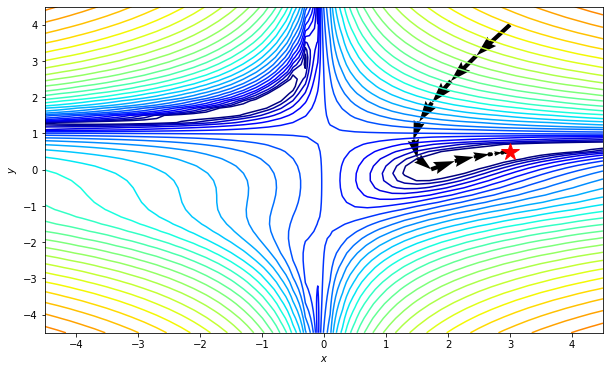

In [40]:
path = gradient_2D_Contour_plot(-4.5, 4.5, 0.2, 3, 4)

In [41]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [42]:
HTML(anim.to_html5_video())